In [7]:
import torch, matplotlib, matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
matplotlib.rcParams['axes.titlesize'] = 24

Воссоздаём дискретную зависимость вида y = sin(x) для случайного набора точек:

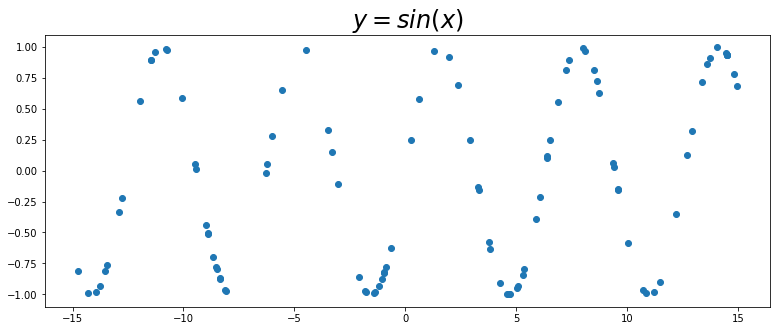

In [8]:
x_train = torch.rand(100)*30-15
y_train = torch.sin(x_train)
plt.plot(x_train, y_train, 'o')
plt.title('$y = sin(x)$');

Генерируем шум:

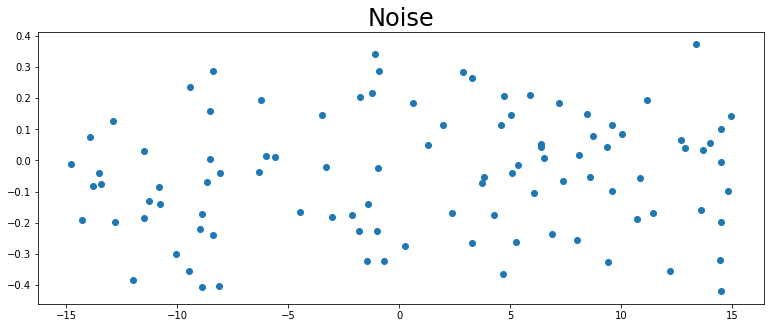

In [9]:
noise = torch.randn(y_train.shape)/5
plt.plot(x_train, noise, 'o')
plt.title('Noise');

Добавляем шум к точным значениям:

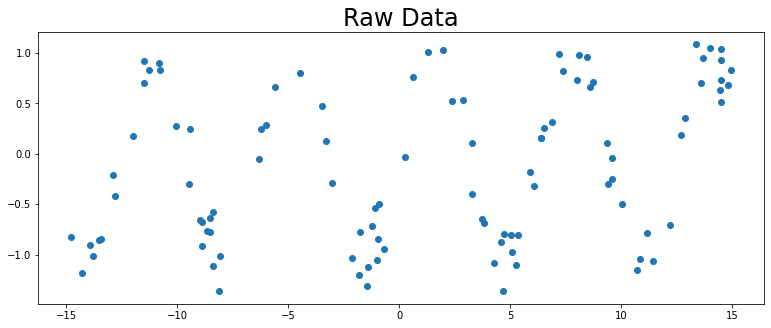

In [10]:
y_train = y_train + noise
plt.plot(x_train, y_train, 'o')
plt.title('Raw Data');

Метод unsqueeze добавляет размерность с одним элементом на указанную позицию (squeeze соответственно убирает все размерности содержащие единственный элемент).

Транспонируем векторы x_train, y_train с помощью метода unsqueeze:

In [11]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
test = torch.tensor([1, 2, 3])
print(test.shape, test.unsqueeze(0).shape, test.unsqueeze(1).shape)
test.unsqueeze_(1)

torch.Size([3]) torch.Size([1, 3]) torch.Size([3, 1])


tensor([[1],
        [2],
        [3]])

Генерируем валидационные данные:

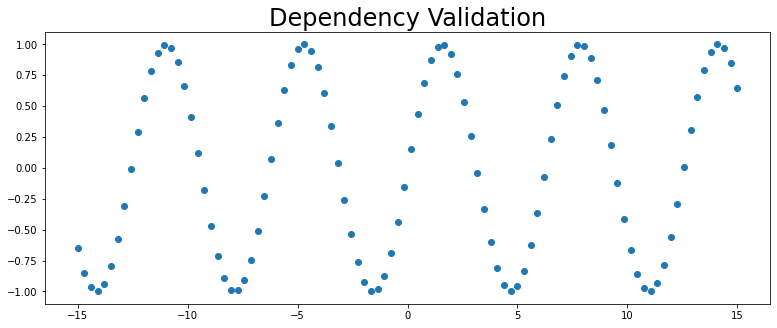

In [12]:
x_valid = torch.linspace(-15, 15, 100)
y_valid = torch.sin(x_valid)
plt.plot(x_valid, y_valid, 'o')
plt.title('Dependency Validation')
x_valid.unsqueeze_(1)
y_valid.unsqueeze_(1);

Определяем class нейронной сети:

In [13]:
class TestNet(torch.nn.Module):
  def __init__(self, n_neurons):
    super().__init__()
    self.fc1 = torch.nn.Linear(1, n_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_neurons, 1)
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    return self.fc2(x)

net = TestNet(50)

Определяем функцию вычисляющую предсказания для выборки с последующим отображением результата на графике и получаем результат для необученной сети:

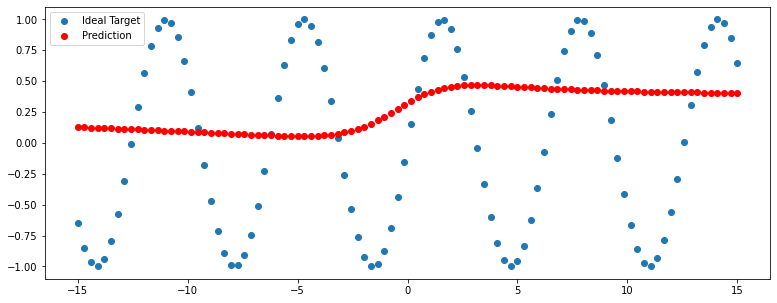

In [14]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x, y, 'o', label='Ideal Target')
  plt.plot(x, y_pred.data, 'o', c='r', label='Prediction')
  plt.legend(loc='upper left')

predict(net, x_valid, y_valid)

Определяем метод оптимизации и функцию потерь:

In [15]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def Loss(p, t):
  sq = (p-t)**2
  return sq.mean()

Обучаем сеть и иллюстрируем результат:

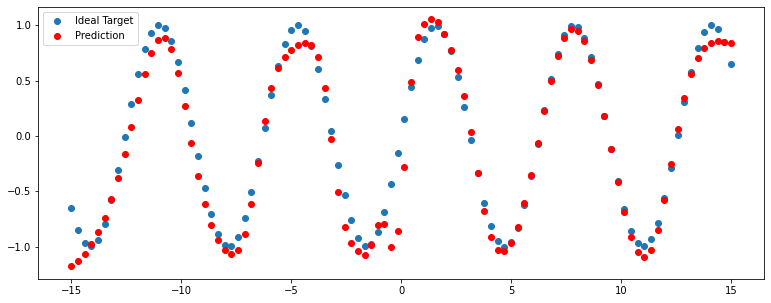

In [16]:
for epoch in range(3000):
  y_pred = net.forward(x_train)
  loss_val = Loss(y_pred, y_train)
  loss_val.backward()
  optimizer.step()
  optimizer.zero_grad()

predict(net, x_valid, y_valid)